## Unsupervised Loss Implementation
- **Problem** : unsuperived training problem
- **Goal** : to have an impression of the gradient decent, which is finding the optimium minmia

In [1]:
# from pathlib import Path
# import sys

# parent_path = Path.cwd().parent
# sys.path.append(str(parent_path))
# from utils import functions as fn

from random import Random
from typing import List, Tuple
from math import sqrt
from matplotlib import pyplot as plt
# import matplotlib as mp
# style = plt.style.available
# mp.style.use(style[9])

In [2]:
from math import log
log(2.71828)

0.999999327347282

## data generation
- taking into consideration that you have already wrote the lecture code
- introduce different forms of generating data

In [3]:
def gen_rnd_pts(
    n: int, 
    seed: int = 5, 
    a: float = 0, 
    b: float = 1
) -> Tuple[List[float], List[float]]:
    """generates n random points in the unit square
    Args:
        n (int): number of points to generate
    Returns:
        Tuple[List[float], List[float]]: list of x coordinates and list of y coordinates
    """
    random_gen = Random()
    random_gen.seed(seed)
    # * a = low, b = high
    lst_x = [random_gen.uniform(a=a, b=b) for _ in range(n)]
    lst_y = [random_gen.uniform(a=a, b=b) for _ in range(n)]
    return lst_x, lst_y


## generating more specific data
- linear data (degree 1)
- quadratic data (degree 2) #* same concept as linear data but more vaiable 
- any defiend function for data generation

In [4]:
def gen_linear_data(
    low: float, high: float, step: float, slope: float = 2, intercept: float = 1
) -> List[float]:
    """generates exact linear points with in the range of low and high with the given step size

    Args:
        low (float): lowest value of the range
        high (float): highest value of the range
        step (float): step size of the range
        slope (float, optional): slop of the linear . Defaults to 2.
        intercept (float, optional): intercetion with y-axis. Defaults to 1.
    Returns:
        List[float]: _description_
    """
    m = slope
    c = intercept
    linear_data = [m * i + c for i in range(low, high, step)]
    return linear_data

In [5]:
def quadritic_data(
    low: float, high: float, step: float, a: float = 1, b: float = 0, c: float = 0
) -> List[float]:
    """generates exact linear points with in the range of low and high with the given step size

    Args:
        low (float): lowest value of the range
        high (float): highest value of the range
        step (float): step size of the range
        a (float, optional): coefficient of x^2. Defaults to 1.
        b (float, optional): coefficient of x. Defaults to 0.
        c (float, optional): intercetion with y-axis. Defaults to 1.
    Returns:
        List[float]: _description_
    """
    quadritic_data = [a * i**2 + b * i + c for i in range(low, high, step)]
    return quadritic_data

## **Unsupervised Loss Function**
- Unsupervised LOSS function, it is optimization on a function or a goal without knowing the target
- example we don't have the center of data, but we want to find it through the loss function (mean of eculedian distance minimization)
- in the lecture the target was to minimize the total eculedian distance between the initialized point and the data points -> move the initialized point to the undifined center

let :
- the solution $(x_p, y_p)$ 
- the dataset D is a ${(x_i, y_i)}_{i=1}^n$
- $L$ is the loss function and is defined as 
  $$
  (x_p, y_p) = argmin(L)
  $$
  where $L$ is defined as
  $$
  L = \frac{1}{N} \sum_{i=0}^{N-1}\sqrt{(x_i - x_p)^2 + (y_i - y_p)^2}
  $$

## **Supervised Loss Function**
- by defining a mapping from x -> y function
- having true values fo y to be compared with the predicted values of y for the gradients calculation 


#### Mean squared error (MSE)
$$
MSE = \frac{1}{N} \sum_{i=0}^{N-1}(y_{true} - y_{predicted})^2
$$

#### Mean absolute error (MAE)
$$
MAE = \frac{1}{N} \sum_{i=0}^{N-1}|y_{true} - y_{predicted}|
$$

#### Root mean squared error (RMSE)
$$ 
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{N} \sum_{i=0}^{N-1}(y_{true} - y_{predicted})^2}
$$

## Evaluating the Loss Function
- calculating the loss function(total euclidean distance) for an initialized point and the data points
- repeat the process for different initialized points throughout a range of values
- plot the loss function values for each initialized point

In [6]:
import random
random.uniform(0, 1)

0.36501703159357435

In [7]:
from math import sqrt

def loss(xi, yi, datax , datay):
    """calculated the avg euclidean distance between a point (xi, yi) and a set of points (datax, datay)

    Args:
        xi (_type_): x coordinate of the point
        yi (_type_): y coordinate of the point
        datax (_type_): x coordinates of the data points
        datay (_type_): y coordinates of the data points
    """
    
    L = [sqrt((xi - x)**2+ (yi - y)**2) for x, y in zip(datax, datay)]
    L = sum(L) / len(L)
    return L

## Plotting the Loss Function(Gradient Map)
- define a meshgrid for the initialized points
- calculate the loss function for each point in the meshgrid
  - calculate L(X,Y) for each value in the meshgrid
- Visualize


In [8]:
STEP = 0.01
MESH_SIZE = 300

#* define mesh [-1, 2] for x and y
x_mesh = [-1 +i * STEP for i in range(MESH_SIZE)]
y_mesh = [-1 +i * STEP for i in range(MESH_SIZE)]

#* calculate loss Mesh
data_x, data_y  = gen_rnd_pts(100)
loss_mesh = [[loss(x, y, data_x, data_y) for x in x_mesh] for y in y_mesh]


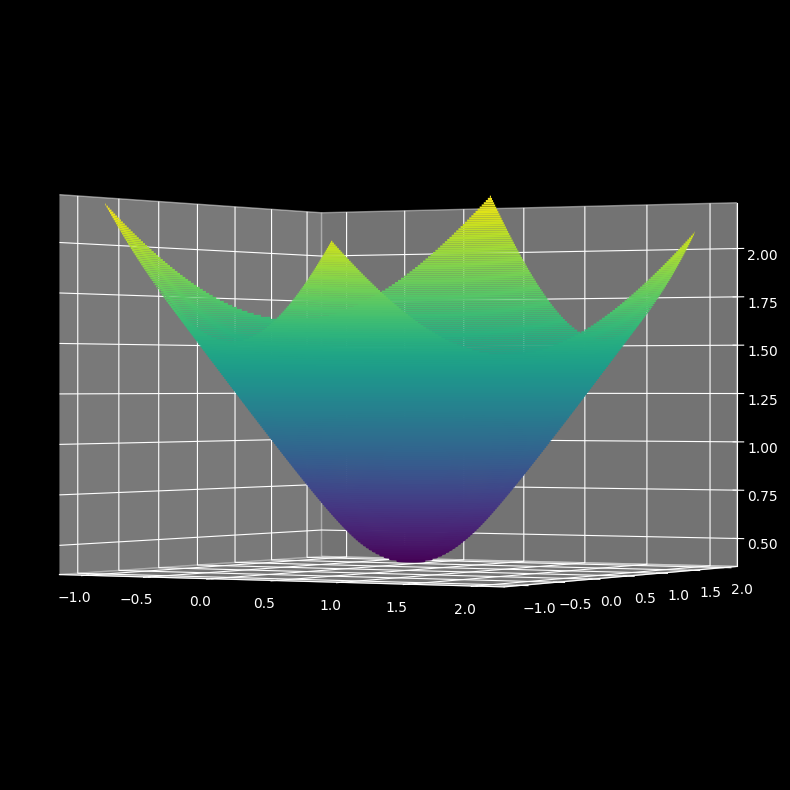

In [9]:
fig = plt.figure(figsize=(10, 10))
# mp.style.use(plt.style.available[6])
ax = fig.add_subplot(1, 1, 1, projection = '3d')
#ax.stem() #TODO steam plot
ax.contour(x_mesh, y_mesh, loss_mesh, levels =200)
ax.view_init(elev=0,)

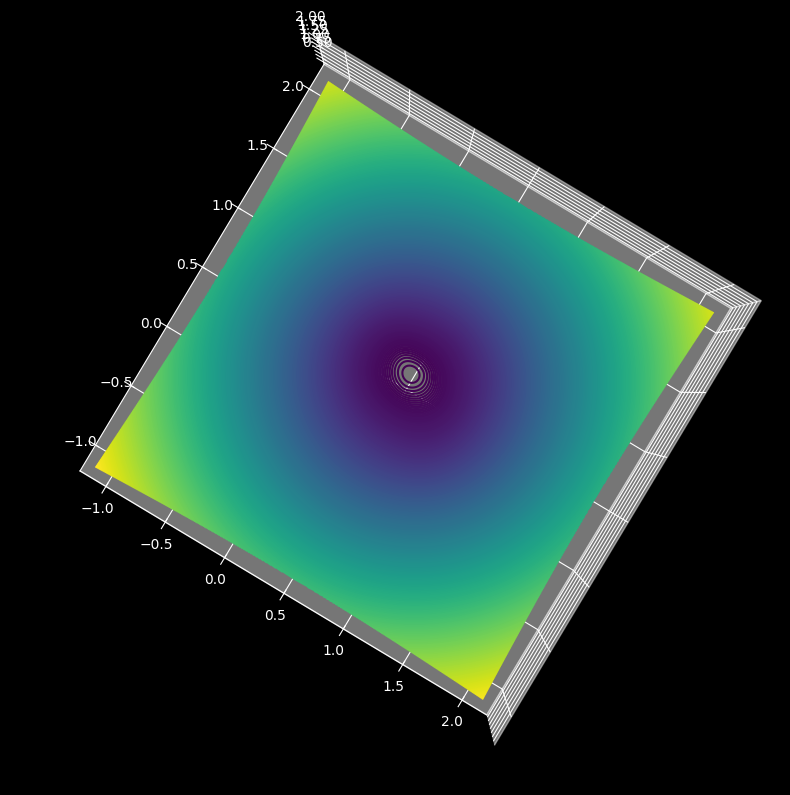

In [10]:
fig = plt.figure(figsize=(10, 10))
# mp.style.use(plt.style.available[6])
ax = fig.add_subplot(1, 1, 1, projection = '3d')
#* increase the levels for a better gradient map view
ax.contour(x_mesh, y_mesh, loss_mesh, levels =500)
ax.view_init(elev=90,)

## Compute the Gradient Descent
- calculate the slope of the loss function at each point in the meshgrid
  - gradient descent for all points is called `Full Batch Gradient Descent`
  - gradient descent for a batch of points is called `Mini Batch Gradient Descent`
  - gradient descent for one point is called `Stochastic Gradient Descent`

- STEPS 
  - define rate of changing of loss with respect to each variable that is contributing to the loss function -> (X, Y) in our case 
  - Define an optimizer that will update the values of the variables (X, Y) to minimize the loss function

## **Gradient Descent**
- define Loss 
$$
L = \frac{1}{N} \sum_{i=0}^{N-1}\sqrt{(x_i - x_p)^2 + (y_i - y_p)^2}
$$

- rate of change of L $\rightarrow$ $dl$
  - aka grads

$$
\frac{\partial{L}}{\partial{x}} = \lim_{h \rightarrow 0} \frac{L(x+h, y) - L(x,y)}{h}
$$

$$
\frac{\partial{L}}{\partial{y}} = \lim_{h \rightarrow 0} \frac{L(x, y+h) - L(x,y)}{h}
$$
where 
  - $h$ is the step size of the Limit function


- Optimization 
  - update the values of the variables (X, Y) to minimize the loss function
$$
x_{new} = x_{old} - \eta * \frac{\partial{L}}{\partial{x}}
$$

$$
y_{new} = y_{old} - \eta * \frac{\partial{L}}{\partial{y}}
$$
where 
  - $\eta$ is the learning rate, think of it as the Gradient step in the direction of learnt slop of the loss function $\rightarrow$ in the lecture it was defined as Delta but i'll be usring Lr instead



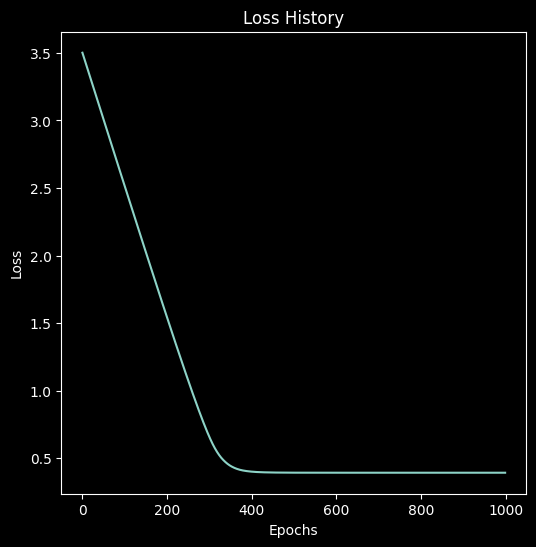

In [11]:
xi, yi = 3, 3
data_x, data_y = gen_rnd_pts(100)
Epochs = 1000  # * number of iterations to perform gradient descending
lr = 0.01  # * learning rate
h = 0.001  # * step size for the limit calculation

epoch_losses = []
dl_dx_values = []  # * list of dl/dx values, grads
dl_dy_values = []  # * list of dl/dy values, grads
x_values = []  # * list of x values
y_values = []  # * list of y values

for _ in range(Epochs):
    # * calculate the loss at xi, yi
    epoch_losses.append(loss(xi, yi, data_x, data_y))

    # * calculate the gradient at xi, yi -> dl/dx, dl/dy
    dl_dx = (loss(xi + h, yi, data_x, data_y) - loss(xi, yi, data_x, data_y)) / h
    dl_dy = (loss(xi, yi + h, data_x, data_y) - loss(xi, yi, data_x, data_y)) / h
    
    #* append values to the lits
    dl_dx_values.append(dl_dx)
    dl_dy_values.append(dl_dy)
    
    #* optimization step
    xi = xi - lr * dl_dx
    yi = yi - lr * dl_dy
    
    #* append the new values to the list
    x_values.append(xi)
    y_values.append(yi)
    
#* plot the loss history at each epoch
# mp.style.use(style[9])
plt.figure(figsize=(6, 6))
plt.plot(epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

<Figure size 1000x1000 with 0 Axes>

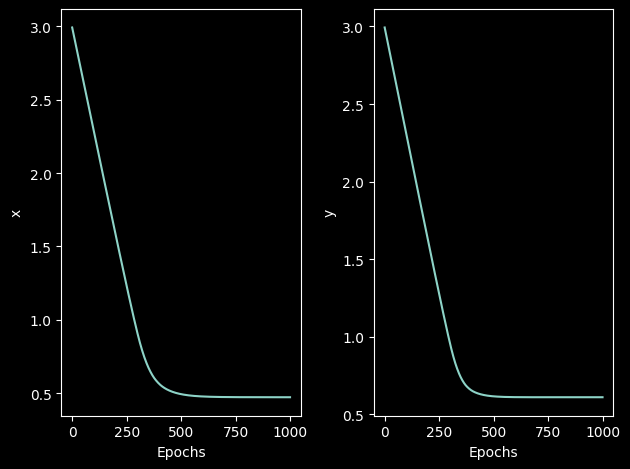

In [12]:
# mp.style.use(style[9])
plt.figure(figsize=(10, 10), tight_layout=True)
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.plot(x_values, label="x")
plt.xlabel("Epochs")
plt.ylabel("x")
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(y_values, label="y")
plt.xlabel("Epochs")
plt.ylabel("y")
plt.tight_layout()
plt.show()

## Plotting 
- how the points are moving after each iteration

Text(0.5, 1.0, 'Generated by for loop')

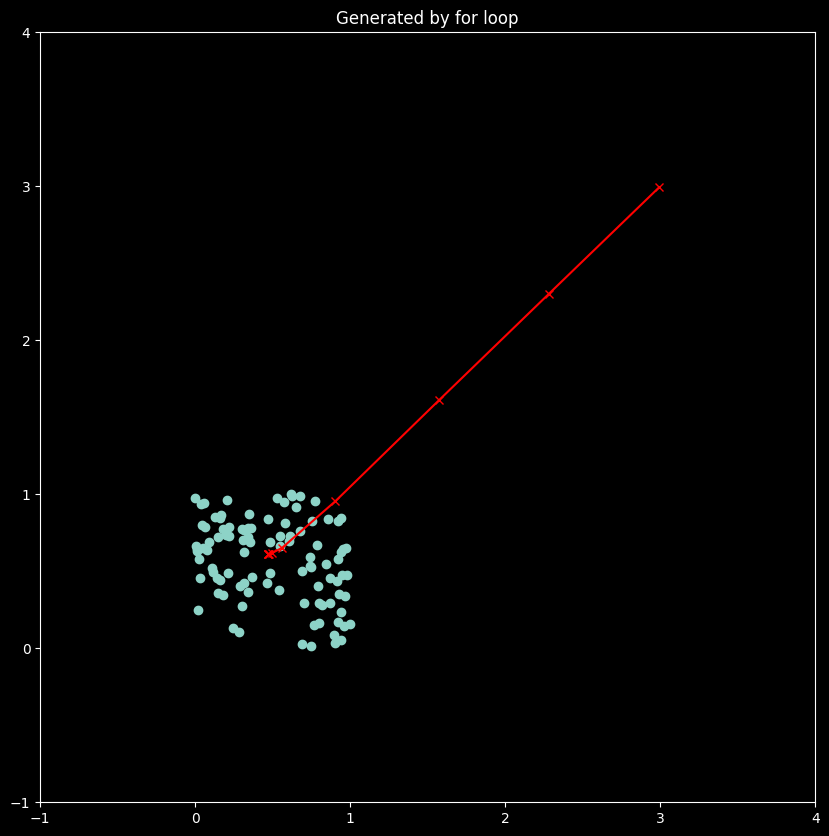

In [13]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 1, 1,)
ax1.set_ylim(top=4 , bottom= -1)
ax1.set_xlim(right=4, left=-1)
ax1.scatter(x = data_x, y= data_y, marker='o')
#* plot only every 100th point
ax1.plot(x_values[::100], y_values[::100], marker='x', color='red', label='start')
ax1.set_title('Generated by for loop')

#fig.show()

## Comments 
- what we did is called `Gradient Descent` and it is a way to optimize a path(loss function) to a minimum point
- what we did unsuperivsed learning of the midpoint of data by intializing a point and moving it to the center of the data
  - How? by minimizing the total euclidean distance between the initialized point and the data points
- Steps
  - Define a loss function
  - define rate of changing of the loss function with respect to each variable that is contributing to the loss function -> dl/dx
  - define an optmized update for the initialized point to minimize the loss function -> x_new = x_old - lr * dl/dx